<a href="https://colab.research.google.com/github/PearlSikka/Battles-in-Time/blob/main/task_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

3. Implement a convolutional neural network to predict the ID of any card using images
from train-XXX and test-XXX. As there are not many examples, you will need to think about
how to prevent overfitting. Test your solution on examples from both train-XXX and test-
XXX images. If you like, you may choose to use transfer-learning. Demonstrate the
performance of your predictor using appropriate train-validate-test splits, and giving
qualitative and quantitative results of your validation.

CODE HAS BEEN TESTED ON GOOGLE COLAB ON PYTHON VERSION 3.7.12

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Importing necessary libraries**

In [3]:
import os                                                                         #for OS operations
import numpy as np                                                                #for numerical arrays
import glob                                                                       #for reading files 
import pandas as pd

import matplotlib.pyplot as plt                                                   #for plotting images
import matplotlib.image as mpimg

import cv2                                                                        #opencv                                                             

import keras                                                                      #keras
from keras.models import Sequential                                               #for sequential model

from keras.layers import Dense, Dropout, Flatten                                  #for different layers in keras model
from keras.layers import Conv2D, MaxPooling2D
import random as rng                                                
rng.seed(12345)

In [4]:
data_dir='drive/My Drive/Image_Analysis/DATA/'                                    #data directory path
results_dir='drive/My Drive/Image_Analysis/RESULTS_3/'                              #results directory path

**Training set**: Loading train set card images from results_dir with resolution of (256,256) in data_img and corresponding card labels in labels list. Since train_001 IDs are not known, they are not used in training.

In [5]:
data_img=[]
labels=[]
resolution = (256,256) 

im= cv2.imread(results_dir+'train-002_1.jpg')
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im= cv2.resize(im,resolution)
data_img.append(im)
labels.append('048')
im= cv2.imread(results_dir+'train-002_2.jpg')
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im=cv2.resize(im,resolution)
data_img.append(im)
labels.append('033')
im= cv2.imread(results_dir+'train-002_3.jpg')
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im=cv2.resize(im,resolution)
data_img.append(im)
labels.append('026')
im= cv2.imread(results_dir+'train-002_4.jpg')
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im=cv2.resize(im,resolution)
data_img.append(im)
labels.append('036')
im= cv2.imread(results_dir+'train-002_5.jpg')
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im=cv2.resize(im,resolution)
data_img.append(im)
labels.append('063')
im= cv2.imread(results_dir+'train-002_6.jpg')
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im=cv2.resize(im,resolution)
data_img.append(im)
labels.append('054')
im= cv2.imread(results_dir+'train-002_7.jpg')
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im=cv2.resize(im,resolution)
data_img.append(im)
labels.append('033')
im= cv2.imread(results_dir+'train-002_8.jpg')
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im=cv2.resize(im,resolution)
data_img.append(im)
labels.append('210')
im= cv2.imread(results_dir+'train-002_9.jpg')
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im=cv2.resize(im,resolution)
data_img.append(im)
labels.append('052')
im= cv2.imread(results_dir+'train-002_10.jpg')
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im=cv2.resize(im,resolution)
data_img.append(im)
labels.append('033')
im= cv2.imread(results_dir+'train-002_11.jpg')
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im=cv2.resize(im,resolution)
data_img.append(im)
labels.append('047')
im= cv2.imread(results_dir+'train-002_12.jpg')
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im=cv2.resize(im,resolution)
data_img.append(im)
labels.append('031')
im= cv2.imread(results_dir+'train-002_13.jpg')
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im=cv2.resize(im,resolution)
data_img.append(im)
labels.append('018')
im= cv2.imread(results_dir+'train-002_14.jpg')
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im=cv2.resize(im,resolution)
data_img.append(im)
labels.append('040')
im= cv2.imread(results_dir+'train-002_15.jpg')
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im=cv2.resize(im,resolution)
data_img.append(im)
labels.append('033')
im= cv2.imread(results_dir+'train-002_16.jpg')
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im=cv2.resize(im,resolution)
data_img.append(im)
labels.append('005')
im= cv2.imread(results_dir+'train-002_17.jpg')
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im=cv2.resize(im,resolution)
data_img.append(im)
labels.append('052')
im= cv2.imread(results_dir+'train-002_18.jpg')
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im=cv2.resize(im,resolution)
data_img.append(im)
labels.append('067')
im= cv2.imread(results_dir+'train-003_1.jpg')
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im=cv2.resize(im,resolution)
data_img.append(im)
labels.append('083')
im= cv2.imread(results_dir+'train-003_2.jpg')
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im=cv2.resize(im,resolution)
data_img.append(im)
labels.append('063')
im= cv2.imread(results_dir+'train-003_3.jpg')
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im=cv2.resize(im,resolution)
data_img.append(im)
labels.append('033')
im= cv2.imread(results_dir+'train-003_4.jpg')
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im=cv2.resize(im,resolution)
data_img.append(im)
labels.append('068')
im= cv2.imread(results_dir+'train-003_5.jpg')
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im=cv2.resize(im,resolution)
data_img.append(im)
labels.append('025')
im= cv2.imread(results_dir+'train-003_6.jpg')
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im=cv2.resize(im,resolution)
data_img.append(im)
labels.append('068')
im= cv2.imread(results_dir+'train-003_7.jpg')
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im=cv2.resize(im,resolution)
data_img.append(im)
labels.append('033')
im= cv2.imread(results_dir+'train-003_8.jpg')
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im=cv2.resize(im,resolution)
data_img.append(im)
labels.append('076')
im= cv2.imread(results_dir+'train-003_9.jpg')
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im=cv2.resize(im,resolution)
data_img.append(im)
labels.append('057')
im= cv2.imread(results_dir+'train-003_10.jpg')
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im=cv2.resize(im,resolution)
data_img.append(im)
labels.append('054')
im= cv2.imread(results_dir+'train-003_11.jpg')
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im=cv2.resize(im,resolution)
data_img.append(im)
labels.append('066')
im= cv2.imread(results_dir+'train-003_12.jpg')
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im=cv2.resize(im,resolution)
data_img.append(im)
labels.append('060')
im= cv2.imread(results_dir+'train-003_13.jpg')
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im=cv2.resize(im,resolution)
data_img.append(im)
labels.append('017')
im= cv2.imread(results_dir+'train-003_14.jpg')
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im=cv2.resize(im,resolution)
data_img.append(im)
labels.append('089')
im= cv2.imread(results_dir+'train-003_15.jpg')
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im=cv2.resize(im,resolution)
data_img.append(im)
labels.append('054')
im= cv2.imread(results_dir+'train-003_16.jpg')
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im=cv2.resize(im,resolution)
data_img.append(im)
labels.append('057')
im= cv2.imread(results_dir+'train-003_17.jpg')
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im=cv2.resize(im,resolution)
data_img.append(im)
labels.append('057')
im= cv2.imread(results_dir+'train-003_18.jpg')
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im=cv2.resize(im,resolution)
data_img.append(im)
labels.append('073')
im= cv2.imread(results_dir+'train-004_1.jpg')
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im= cv2.resize(im,resolution)
data_img.append(im)
labels.append('056')
im= cv2.imread(results_dir+'train-004_2.jpg')
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im=cv2.resize(im,resolution)
data_img.append(im)
labels.append('062')
im= cv2.imread(results_dir+'train-004_3.jpg')
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im=cv2.resize(im,resolution)
data_img.append(im)
labels.append('001')
im= cv2.imread(results_dir+'train-004_4.jpg')
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im=cv2.resize(im,resolution)
data_img.append(im)
labels.append('089')
im= cv2.imread(results_dir+'train-004_5.jpg')
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im=cv2.resize(im,resolution)
data_img.append(im)
labels.append('001')
im= cv2.imread(results_dir+'train-004_6.jpg')
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im=cv2.resize(im,resolution)
data_img.append(im)
labels.append('069')
im= cv2.imread(results_dir+'train-004_7.jpg')
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im=cv2.resize(im,resolution)
data_img.append(im)
labels.append('011')
im= cv2.imread(results_dir+'train-004_8.jpg')
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im=cv2.resize(im,resolution)
data_img.append(im)
labels.append('063')
im= cv2.imread(results_dir+'train-004_9.jpg')
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im=cv2.resize(im,resolution)
data_img.append(im)
labels.append('015')
im= cv2.imread(results_dir+'train-004_10.jpg')
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im=cv2.resize(im,resolution)
data_img.append(im)
labels.append('059')
im= cv2.imread(results_dir+'train-004_11.jpg')
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im=cv2.resize(im,resolution)
data_img.append(im)
labels.append('015')
im= cv2.imread(results_dir+'train-004_12.jpg')
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im=cv2.resize(im,resolution)
data_img.append(im)
labels.append('096')
im= cv2.imread(results_dir+'train-004_13.jpg')
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im=cv2.resize(im,resolution)
data_img.append(im)
labels.append('004')
im= cv2.imread(results_dir+'train-004_14.jpg')
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im=cv2.resize(im,resolution)
data_img.append(im)
labels.append('044')
im= cv2.imread(results_dir+'train-004_15.jpg') 
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im=cv2.resize(im,resolution)
data_img.append(im)
labels.append('065')
im= cv2.imread(results_dir+'train-004_16.jpg')
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im=cv2.resize(im,resolution)
data_img.append(im)
labels.append('065')
im= cv2.imread(results_dir+'train-004_17.jpg')
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im=cv2.resize(im,resolution)
data_img.append(im)
labels.append('056')
im= cv2.imread(results_dir+'train-004_18.jpg')
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im=cv2.resize(im,resolution)
data_img.append(im)
labels.append('036')
im= cv2.imread(results_dir+'train-005_1.jpg')
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im=cv2.resize(im,resolution)
data_img.append(im)
labels.append('068')
im= cv2.imread(results_dir+'train-005_2.jpg')
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im=cv2.resize(im,resolution)
data_img.append(im)
labels.append('083')
im= cv2.imread(results_dir+'train-005_3.jpg')
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im=cv2.resize(im,resolution)
data_img.append(im)
labels.append('025')
im= cv2.imread(results_dir+'train-005_4.jpg')
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im=cv2.resize(im,resolution)
data_img.append(im)
labels.append('033')
im= cv2.imread(results_dir+'train-005_5.jpg')
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im=cv2.resize(im,resolution)
data_img.append(im)
labels.append('063')
im= cv2.imread(results_dir+'train-005_6.jpg')
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im=cv2.resize(im,resolution)
data_img.append(im)
labels.append('060')
im= cv2.imread(results_dir+'train-005_7.jpg')
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im=cv2.resize(im,resolution)
data_img.append(im)
labels.append('033')
im= cv2.imread(results_dir+'train-005_8.jpg')
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im=cv2.resize(im,resolution)
data_img.append(im)
labels.append('066')
im= cv2.imread(results_dir+'train-005_9.jpg')
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im=cv2.resize(im,resolution)
data_img.append(im)
labels.append('054')
im= cv2.imread(results_dir+'train-005_10.jpg')
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im=cv2.resize(im,resolution)
data_img.append(im)
labels.append('057')
im= cv2.imread(results_dir+'train-005_11.jpg')
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im=cv2.resize(im,resolution)
data_img.append(im)
labels.append('076')
im= cv2.imread(results_dir+'train-005_12.jpg')
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im=cv2.resize(im,resolution)
data_img.append(im)
labels.append('060')
im= cv2.imread(results_dir+'train-005_13.jpg')
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im=cv2.resize(im,resolution)
data_img.append(im)
labels.append('057')
im= cv2.imread(results_dir+'train-005_14.jpg')
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im=cv2.resize(im,resolution)
data_img.append(im)
labels.append('057')
im= cv2.imread(results_dir+'train-005_15.jpg')
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im=cv2.resize(im,resolution)
data_img.append(im)
labels.append('054')
im= cv2.imread(results_dir+'train-005_16.jpg')
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im=cv2.resize(im,resolution)
data_img.append(im)
labels.append('089')
im= cv2.imread(results_dir+'train-005_17.jpg')
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im=cv2.resize(im,resolution)
data_img.append(im)
labels.append('017')

im= cv2.imread(results_dir+'train-006_1.jpg')
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im=cv2.resize(im,resolution)
data_img.append(im)
labels.append('005')
im= cv2.imread(results_dir+'train-006_2.jpg')
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im=cv2.resize(im,resolution)
data_img.append(im)
labels.append('063')
im= cv2.imread(results_dir+'train-006_3.jpg')
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im=cv2.resize(im,resolution)
data_img.append(im)
labels.append('018')
im= cv2.imread(results_dir+'train-006_4.jpg')
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im=cv2.resize(im,resolution)
data_img.append(im)
labels.append('040')
im= cv2.imread(results_dir+'train-006_5.jpg')
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im=cv2.resize(im,resolution)
data_img.append(im)
labels.append('033')
im= cv2.imread(results_dir+'train-006_6.jpg')
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im=cv2.resize(im,resolution)
data_img.append(im)
labels.append('047')
im= cv2.imread(results_dir+'train-006_7.jpg')
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im=cv2.resize(im,resolution)
data_img.append(im)
labels.append('210')
im= cv2.imread(results_dir+'train-006_8.jpg')
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im=cv2.resize(im,resolution)
data_img.append(im)
labels.append('052')
im= cv2.imread(results_dir+'train-006_9.jpg')
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im=cv2.resize(im,resolution)
data_img.append(im)
labels.append('067')
im= cv2.imread(results_dir+'train-006_10.jpg')
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im=cv2.resize(im,resolution)
data_img.append(im)
labels.append('052')
im= cv2.imread(results_dir+'train-006_11.jpg')
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im=cv2.resize(im,resolution)
data_img.append(im)
labels.append('036')
im= cv2.imread(results_dir+'train-006_12.jpg') 
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im=cv2.resize(im,resolution)
data_img.append(im)
labels.append('048')
im= cv2.imread(results_dir+'train-006_13.jpg')
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im=cv2.resize(im,resolution)
data_img.append(im)
labels.append('033')
im= cv2.imread(results_dir+'train-006_14.jpg')
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im=cv2.resize(im,resolution)
data_img.append(im)
labels.append('054')
im= cv2.imread(results_dir+'train-006_15.jpg')
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im=cv2.resize(im,resolution)
data_img.append(im)
labels.append('026')
im= cv2.imread(results_dir+'train-006_16.jpg')
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im=cv2.resize(im,resolution)
data_img.append(im)
labels.append('031')


im= cv2.imread(results_dir+'train-007_1.jpg')
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im=cv2.resize(im,resolution)
data_img.append(im)
labels.append('024')
im= cv2.imread(results_dir+'train-007_2.jpg')
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im=cv2.resize(im,resolution)
data_img.append(im)
labels.append('002')
im= cv2.imread(results_dir+'train-007_3.jpg')
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im=cv2.resize(im,resolution)
data_img.append(im)
labels.append('028')
im= cv2.imread(results_dir+'train-007_4.jpg')
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im=cv2.resize(im,resolution)
data_img.append(im)
labels.append('065')
im= cv2.imread(results_dir+'train-007_5.jpg')
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im=cv2.resize(im,resolution)
data_img.append(im)
labels.append('021')
im= cv2.imread(results_dir+'train-007_6.jpg')
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im=cv2.resize(im,resolution)
data_img.append(im)
labels.append('098')
im= cv2.imread(results_dir+'train-007_7.jpg')
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im=cv2.resize(im,resolution)
data_img.append(im)
labels.append('011')
im= cv2.imread(results_dir+'train-007_8.jpg')
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im=cv2.resize(im,resolution)
data_img.append(im)
labels.append('037')
im= cv2.imread(results_dir+'train-007_9.jpg')
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im=cv2.resize(im,resolution)
data_img.append(im)
labels.append('045')
im= cv2.imread(results_dir+'train-007_10.jpg')
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im=cv2.resize(im,resolution)
data_img.append(im)
labels.append('024')
im= cv2.imread(results_dir+'train-007_11.jpg')
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im=cv2.resize(im,resolution)
data_img.append(im)
labels.append('082')
im= cv2.imread(results_dir+'train-007_12.jpg') 
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im=cv2.resize(im,resolution)
data_img.append(im)
labels.append('042')
im= cv2.imread(results_dir+'train-007_13.jpg')
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im=cv2.resize(im,resolution)
data_img.append(im)
labels.append('092')
im= cv2.imread(results_dir+'train-007_14.jpg')
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im=cv2.resize(im,resolution)
data_img.append(im)
labels.append('007')
im= cv2.imread(results_dir+'train-007_15.jpg')
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im=cv2.resize(im,resolution)
data_img.append(im)
labels.append('011')
im= cv2.imread(results_dir+'train-007_16.jpg')
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im=cv2.resize(im,resolution)
data_img.append(im)
labels.append('054')
im= cv2.imread(results_dir+'train-007_17.jpg')
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im=cv2.resize(im,resolution)
data_img.append(im)
labels.append('096')
im= cv2.imread(results_dir+'train-007_18.jpg')
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im=cv2.resize(im,resolution)
data_img.append(im)
labels.append('063')


im= cv2.imread(results_dir+'train-008_1.jpg')
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im=cv2.resize(im,resolution)
data_img.append(im)
labels.append('114')
im= cv2.imread(results_dir+'train-008_2.jpg')
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im=cv2.resize(im,resolution)
data_img.append(im)
labels.append('168')
im= cv2.imread(results_dir+'train-008_3.jpg')
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im=cv2.resize(im,resolution)
data_img.append(im)
labels.append('142')
im= cv2.imread(results_dir+'train-008_4.jpg')
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im=cv2.resize(im,resolution)
data_img.append(im)
labels.append('115')
im= cv2.imread(results_dir+'train-008_5.jpg')
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im=cv2.resize(im,resolution)
data_img.append(im)
labels.append('101')
im= cv2.imread(results_dir+'train-008_6.jpg')
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im=cv2.resize(im,resolution)
data_img.append(im)
labels.append('190')
im= cv2.imread(results_dir+'train-008_7.jpg')
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im=cv2.resize(im,resolution)
data_img.append(im)
labels.append('104')
im= cv2.imread(results_dir+'train-008_8.jpg')
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im=cv2.resize(im,resolution)
data_img.append(im)
labels.append('124')
im= cv2.imread(results_dir+'train-008_9.jpg')
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im=cv2.resize(im,resolution)
data_img.append(im)
labels.append('183')
im= cv2.imread(results_dir+'train-008_10.jpg')
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im=cv2.resize(im,resolution)
data_img.append(im)
labels.append('164')
im= cv2.imread(results_dir+'train-008_11.jpg')
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im=cv2.resize(im,resolution)
data_img.append(im)
labels.append('138')
im= cv2.imread(results_dir+'train-008_12.jpg') 
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im=cv2.resize(im,resolution)
data_img.append(im)
labels.append('087')
im= cv2.imread(results_dir+'train-008_13.jpg')
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im=cv2.resize(im,resolution)
data_img.append(im)
labels.append('161')
im= cv2.imread(results_dir+'train-008_14.jpg')
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im=cv2.resize(im,resolution)
data_img.append(im)
labels.append('192')
im= cv2.imread(results_dir+'train-008_15.jpg')
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im=cv2.resize(im,resolution)
data_img.append(im)
labels.append('177')
im= cv2.imread(results_dir+'train-008_16.jpg')
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im=cv2.resize(im,resolution)
data_img.append(im)
labels.append('150')
im= cv2.imread(results_dir+'train-008_17.jpg')
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im=cv2.resize(im,resolution)
data_img.append(im)
labels.append('160')


im= cv2.imread(results_dir+'train-009_1.jpg')
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im=cv2.resize(im,resolution)
data_img.append(im)
labels.append('146')
im= cv2.imread(results_dir+'train-009_2.jpg')
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im=cv2.resize(im,resolution)
data_img.append(im)
labels.append('108')
im= cv2.imread(results_dir+'train-009_3.jpg')
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im=cv2.resize(im,resolution)
data_img.append(im)
labels.append('189')
im= cv2.imread(results_dir+'train-009_4.jpg')
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im=cv2.resize(im,resolution)
data_img.append(im)
labels.append('127')
im= cv2.imread(results_dir+'train-009_5.jpg')
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im=cv2.resize(im,resolution)
data_img.append(im)
labels.append('151')
im= cv2.imread(results_dir+'train-009_6.jpg')
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im=cv2.resize(im,resolution)
data_img.append(im)
labels.append('198')
im= cv2.imread(results_dir+'train-009_7.jpg')
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im=cv2.resize(im,resolution)
data_img.append(im)
labels.append('108')
im= cv2.imread(results_dir+'train-009_8.jpg')
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im=cv2.resize(im,resolution)
data_img.append(im)
labels.append('154')
im= cv2.imread(results_dir+'train-009_9.jpg')
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im=cv2.resize(im,resolution)
data_img.append(im)
labels.append('109')
im= cv2.imread(results_dir+'train-009_10.jpg')
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im=cv2.resize(im,resolution)
data_img.append(im)
labels.append('182')
im= cv2.imread(results_dir+'train-009_11.jpg')
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im=cv2.resize(im,resolution)
data_img.append(im)
labels.append('146')
im= cv2.imread(results_dir+'train-009_12.jpg') 
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im=cv2.resize(im,resolution)
data_img.append(im)
labels.append('129')
im= cv2.imread(results_dir+'train-009_13.jpg')
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im=cv2.resize(im,resolution)
data_img.append(im)
labels.append('106')
im= cv2.imread(results_dir+'train-009_14.jpg')
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im=cv2.resize(im,resolution)
data_img.append(im)
labels.append('136')
im= cv2.imread(results_dir+'train-009_15.jpg')
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im=cv2.resize(im,resolution)
data_img.append(im)
labels.append('139')
im= cv2.imread(results_dir+'train-009_16.jpg')
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im=cv2.resize(im,resolution)
data_img.append(im)
labels.append('147')
im= cv2.imread(results_dir+'train-009_17.jpg')
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im=cv2.resize(im,resolution)
data_img.append(im)
labels.append('109')



im= cv2.imread(results_dir+'train-010_1.jpg')
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im=cv2.resize(im,resolution)
data_img.append(im)
labels.append('191')
im= cv2.imread(results_dir+'train-010_2.jpg') 
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im=cv2.resize(im,resolution)
data_img.append(im)
labels.append('001')
im= cv2.imread(results_dir+'train-010_3.jpg')  
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB) 
im=cv2.resize(im,resolution)
data_img.append(im)
labels.append('133')
im= cv2.imread(results_dir+'train-010_4.jpg')
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im=cv2.resize(im,resolution)
data_img.append(im)
labels.append('148')
im= cv2.imread(results_dir+'train-010_5.jpg')
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im=cv2.resize(im,resolution)
data_img.append(im)
labels.append('146')
im= cv2.imread(results_dir+'train-010_6.jpg')
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im=cv2.resize(im,resolution)
data_img.append(im)
labels.append('142')
im= cv2.imread(results_dir+'train-010_7.jpg') 
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im=cv2.resize(im,resolution)
data_img.append(im)
labels.append('108')
im= cv2.imread(results_dir+'train-010_8.jpg')
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im=cv2.resize(im,resolution)
data_img.append(im)
labels.append('154')
im= cv2.imread(results_dir+'train-010_9.jpg')
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im=cv2.resize(im,resolution)
data_img.append(im)
labels.append('182')
im= cv2.imread(results_dir+'train-010_10.jpg')
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im=cv2.resize(im,resolution)
data_img.append(im)
labels.append('147')
im= cv2.imread(results_dir+'train-010_11.jpg')
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im=cv2.resize(im,resolution)
data_img.append(im)
labels.append('190')
im= cv2.imread(results_dir+'train-010_12.jpg') 
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im=cv2.resize(im,resolution)
data_img.append(im)
labels.append('114')
im= cv2.imread(results_dir+'train-010_13.jpg')
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im=cv2.resize(im,resolution)
data_img.append(im)
labels.append('192')
im= cv2.imread(results_dir+'train-010_14.jpg')
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im=cv2.resize(im,resolution)
data_img.append(im)
labels.append('198')
im= cv2.imread(results_dir+'train-010_15.jpg')
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im=cv2.resize(im,resolution)
data_img.append(im)
labels.append('174')
im= cv2.imread(results_dir+'train-010_16.jpg')
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im=cv2.resize(im,resolution)
data_img.append(im)
labels.append('134')
im= cv2.imread(results_dir+'train-010_17.jpg')
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im=cv2.resize(im,resolution)
data_img.append(im)
labels.append('103')
im= cv2.imread(results_dir+'train-010_18.jpg')
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im=cv2.resize(im,resolution)
data_img.append(im)
labels.append('96')



im= cv2.imread(results_dir+'train-012_1.jpg')
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im=cv2.resize(im,resolution)
data_img.append(im)
labels.append('131')
im= cv2.imread(results_dir+'train-012_2.jpg') 
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im=cv2.resize(im,resolution)
data_img.append(im)
labels.append('139')
im= cv2.imread(results_dir+'train-012_3.jpg')  
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB) 
im=cv2.resize(im,resolution)
data_img.append(im)
labels.append('184')
im= cv2.imread(results_dir+'train-012_4.jpg')
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im=cv2.resize(im,resolution)
data_img.append(im)
labels.append('156')
im= cv2.imread(results_dir+'train-012_5.jpg')
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im=cv2.resize(im,resolution)
data_img.append(im)
labels.append('106')
im= cv2.imread(results_dir+'train-012_6.jpg')
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im=cv2.resize(im,resolution)
data_img.append(im)
labels.append('181')
im= cv2.imread(results_dir+'train-012_7.jpg') 
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im=cv2.resize(im,resolution)
data_img.append(im)
labels.append('111')
im= cv2.imread(results_dir+'train-012_8.jpg')
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im=cv2.resize(im,resolution)
data_img.append(im)
labels.append('156')
im= cv2.imread(results_dir+'train-012_9.jpg')
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im=cv2.resize(im,resolution)
data_img.append(im)
labels.append('189')
im= cv2.imread(results_dir+'train-012_10.jpg')
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im=cv2.resize(im,resolution)
data_img.append(im)
labels.append('172')
im= cv2.imread(results_dir+'train-012_11.jpg')
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im=cv2.resize(im,resolution)
data_img.append(im)
labels.append('181')
im= cv2.imread(results_dir+'train-012_12.jpg') 
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im=cv2.resize(im,resolution)
data_img.append(im)
labels.append('120')
im= cv2.imread(results_dir+'train-012_13.jpg')
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im=cv2.resize(im,resolution)
data_img.append(im)
labels.append('171')
im= cv2.imread(results_dir+'train-012_14.jpg')
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im=cv2.resize(im,resolution)
data_img.append(im)
labels.append('182')
im= cv2.imread(results_dir+'train-012_15.jpg')
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im=cv2.resize(im,resolution)
data_img.append(im)
labels.append('134')
im= cv2.imread(results_dir+'train-012_16.jpg')
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im=cv2.resize(im,resolution)
data_img.append(im)
labels.append('172')
im= cv2.imread(results_dir+'train-012_17.jpg')
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im=cv2.resize(im,resolution)
data_img.append(im)
labels.append('133')



im= cv2.imread(results_dir+'train-013_1.jpg')
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im=cv2.resize(im,resolution)
data_img.append(im)
labels.append('198')
im= cv2.imread(results_dir+'train-013_2.jpg') 
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im=cv2.resize(im,resolution)
data_img.append(im)
labels.append('109')
im= cv2.imread(results_dir+'train-013_3.jpg')  
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB) 
im=cv2.resize(im,resolution)
data_img.append(im)
labels.append('114')
im= cv2.imread(results_dir+'train-013_4.jpg')
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im=cv2.resize(im,resolution)
data_img.append(im)
labels.append('181')
im= cv2.imread(results_dir+'train-013_5.jpg')
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im=cv2.resize(im,resolution)
data_img.append(im)
labels.append('135')
im= cv2.imread(results_dir+'train-013_6.jpg')
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im=cv2.resize(im,resolution)
data_img.append(im)
labels.append('127')
im= cv2.imread(results_dir+'train-013_7.jpg') 
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im=cv2.resize(im,resolution)
data_img.append(im)
labels.append('170')
im= cv2.imread(results_dir+'train-013_8.jpg')
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im=cv2.resize(im,resolution)
data_img.append(im)
labels.append('136')
im= cv2.imread(results_dir+'train-013_9.jpg')
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im=cv2.resize(im,resolution)
data_img.append(im)
labels.append('112')
im= cv2.imread(results_dir+'train-013_10.jpg')
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im=cv2.resize(im,resolution)
data_img.append(im)
labels.append('125')
im= cv2.imread(results_dir+'train-013_11.jpg')
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im=cv2.resize(im,resolution)
data_img.append(im)
labels.append('112')
im= cv2.imread(results_dir+'train-013_12.jpg') 
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im=cv2.resize(im,resolution)
data_img.append(im)
labels.append('139')
im= cv2.imread(results_dir+'train-013_13.jpg')   
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im=cv2.resize(im,resolution)
data_img.append(im)
labels.append('171')
im= cv2.imread(results_dir+'train-013_14.jpg')
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im=cv2.resize(im,resolution)
data_img.append(im)
labels.append('139')
im= cv2.imread(results_dir+'train-013_15.jpg')
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im=cv2.resize(im,resolution)
data_img.append(im)
labels.append('139')
im= cv2.imread(results_dir+'train-013_16.jpg')
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im=cv2.resize(im,resolution)
data_img.append(im)
labels.append('150')
im= cv2.imread(results_dir+'train-013_17.jpg')
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im=cv2.resize(im,resolution)
data_img.append(im)
labels.append('165')
im= cv2.imread(results_dir+'train-013_18.jpg')
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im=cv2.resize(im,resolution)
data_img.append(im)
labels.append('162')


im= cv2.imread(results_dir+'train-014_1.jpg')
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im=cv2.resize(im,resolution)
data_img.append(im)
labels.append('168')
im= cv2.imread(results_dir+'train-014_2.jpg') 
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im=cv2.resize(im,resolution)
data_img.append(im)
labels.append('121')
im= cv2.imread(results_dir+'train-014_3.jpg')  
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB) 
im=cv2.resize(im,resolution)
data_img.append(im)
labels.append('104')
im= cv2.imread(results_dir+'train-014_4.jpg')
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im=cv2.resize(im,resolution)
data_img.append(im)
labels.append('187')
im= cv2.imread(results_dir+'train-014_5.jpg')
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im=cv2.resize(im,resolution)
data_img.append(im)
labels.append('151')
im= cv2.imread(results_dir+'train-014_6.jpg')
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im=cv2.resize(im,resolution)
data_img.append(im)
labels.append('112')
im= cv2.imread(results_dir+'train-014_7.jpg') 
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im=cv2.resize(im,resolution)
data_img.append(im)
labels.append('119')
im= cv2.imread(results_dir+'train-014_8.jpg')
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im=cv2.resize(im,resolution)
data_img.append(im)
labels.append('162')
im= cv2.imread(results_dir+'train-014_9.jpg')
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im=cv2.resize(im,resolution)
data_img.append(im)
labels.append('168')
im= cv2.imread(results_dir+'train-014_10.jpg')
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im=cv2.resize(im,resolution)
data_img.append(im)
labels.append('193')
im= cv2.imread(results_dir+'train-014_11.jpg')
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im=cv2.resize(im,resolution)
data_img.append(im)
labels.append('121')


In [6]:
# convert data_img to numpy arrays and normalize
x = np.array(data_img).astype('float')/255.0
y = np.array(labels)

print('x shape is ', x.shape)
print('y shape is ', y.shape)

x shape is  (203, 256, 256, 3)
y shape is  (203,)


**One-hot encoding of labels**: One hot encoding converts labels to a set of columns with values 1 and 0 depending on the occurence. Each label is represented as a binary vector which makes training the model more efficient.

In [7]:
from keras.utils import np_utils
y = keras.utils.np_utils.to_categorical(y)                                        #converting labels y to one-hot encoding 


In [8]:
# Split the train and the validation set 
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.20, shuffle=True)

In [9]:
print('x_train shape is ', x_train.shape)
print('y_train shape is ', y_train.shape)
print('x_val shape is ', x_val.shape)
print('y_val shape is ', y_val.shape)

x_train shape is  (162, 256, 256, 3)
y_train shape is  (162, 211)
x_val shape is  (41, 256, 256, 3)
y_val shape is  (41, 211)


In [10]:
from keras import backend as K

# input image dimensions
img_rows, img_cols, num_channels = data_img[0].shape

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], num_channels, img_rows, img_cols)
    x_val = x_val.reshape(x_val.shape[0], num_channels, img_rows, img_cols)
    input_shape = (num_channels, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, num_channels)
    x_val = x_val.reshape(x_val.shape[0], img_rows, img_cols, num_channels)
    input_shape = (img_rows, img_cols, num_channels)
    
print('input_shape is ', input_shape)

input_shape is  (256, 256, 3)


**Implementing Keras CNN model**: Keras provides functionality to construct models with multiple sequential layers which perform different operations on the input set. 
Conv2D layer runs convolution with kernel (2,3) on the training image and extracts features. 
MaxPooling layer reduces the dimension of data by taking the max value of the feature cluster map. Output units with softmax activation fn and num_classes as 211 is used.

In [11]:
print('Input shape is ', input_shape)

model = Sequential()


model.add(Conv2D(2, 3, activation='relu', padding="same", input_shape=input_shape))

model.add(MaxPooling2D(pool_size = 2, strides = 2))

model.add(Conv2D(2, 3, activation='relu', padding="same"))

model.add(MaxPooling2D(pool_size = 2, strides = 2))

model.add(Conv2D(2, 3, activation='relu', padding="same"))

model.add(MaxPooling2D(pool_size = 2, strides = 2))

model.add(Flatten())

model.add(Dense(activation='softmax' , units=211)) 


Input shape is  (256, 256, 3)


In [12]:
import tensorflow as tf

batch_size = 20                   
epochs = 10 

model.build(input_shape)
model.summary()

model.compile(loss=tf.keras.losses.categorical_crossentropy,                          # cross entropy loss function
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),                 # Adam optimizer 
              metrics=['accuracy'])

history = model.fit(x_train, y_train,                                                 #fitting model on training set 
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data = (x_val,y_val)                                             #validation of model run on validation set
          )

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 2)       56        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 2)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 2)       38        
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 2)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 2)         38        
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 32, 32, 2)        0

**Plotting accuracy of model for training and validation sets** : It can be seen that the model is overfitting as training accuracy exceeds the validation accuracy.

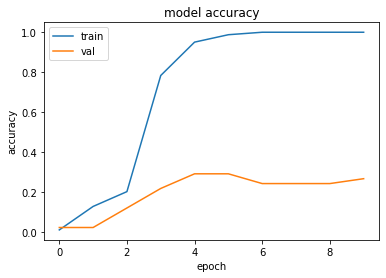

In [13]:
from matplotlib import pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

**Plotting loss of model for training and validation sets** : It can be seen that the model's training loss is decreasing but validation loss is increasing which is not a good indicator 

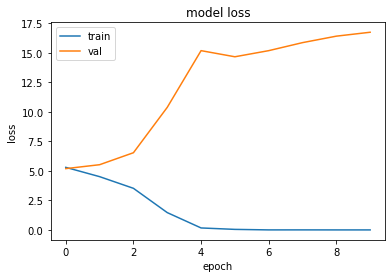

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

**Data Augmentation using Image Generator**: As seen above, the model is overfitting. To reduce the validation loss, more samples can be introduced on which training can be run. For generating more samples, data augmentation is provided by Keras. 

In [15]:
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

datagen = ImageDataGenerator(
        rotation_range=10, # rotation                                              #rotating the images
        horizontal_flip=True # horizontal flip                                     #flipping the images 
)

datagen.fit(x_train)

In [16]:
epochs = 10
# Batch size
batch_size = 20

history = model.fit(datagen.flow(x_train,y_train,                                   #fitting on augmented training data
                                       batch_size=batch_size, 
                                       seed=27,
                                       shuffle=False),
                    epochs=epochs,
                    steps_per_epoch=x_train.shape[0] // batch_size,
                    validation_data=(x_val,y_val),
                    verbose=1)


Epoch 1/10
8/8 [==============================] - 9s 949ms/step - loss: 3.6754 - accuracy: 0.3169 - val_loss: 5.7230 - val_accuracy: 0.0732
Epoch 2/10
8/8 [==============================] - 8s 844ms/step - loss: 3.4044 - accuracy: 0.3310 - val_loss: 8.0870 - val_accuracy: 0.2195
Epoch 3/10
8/8 [==============================] - 6s 736ms/step - loss: 2.6503 - accuracy: 0.4577 - val_loss: 8.8925 - val_accuracy: 0.2683
Epoch 4/10
8/8 [==============================] - 6s 744ms/step - loss: 1.8458 - accuracy: 0.5563 - val_loss: 9.9609 - val_accuracy: 0.3659
Epoch 5/10
8/8 [==============================] - 6s 732ms/step - loss: 1.5744 - accuracy: 0.6549 - val_loss: 10.1191 - val_accuracy: 0.3659
Epoch 6/10
8/8 [==============================] - 6s 778ms/step - loss: 1.1823 - accuracy: 0.7394 - val_loss: 10.3382 - val_accuracy: 0.4146
Epoch 7/10
8/8 [==============================] - 6s 727ms/step - loss: 0.7450 - accuracy: 0.8099 - val_loss: 8.7328 - val_accuracy: 0.3659
Epoch 8/10
8/8 [==

**Plotting accuracy of model for training and validation sets** : It can be seen that the model is performing better on validation data now. The accuracy has improved.

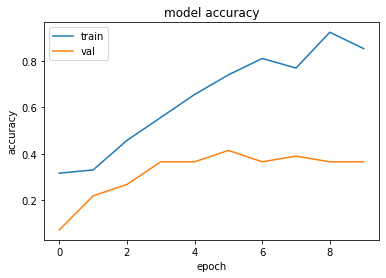

In [17]:
from matplotlib import pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

**Plotting loss of model for training and validation sets** : It can be seen that the model is performing better on validation data now.

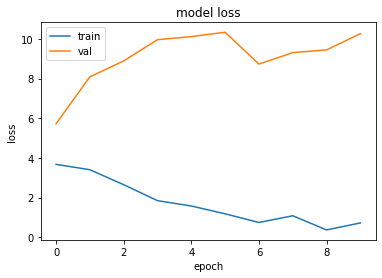

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Saving augmented data model to results_dir

In [19]:
model.save(results_dir+'model_predict_ID.h5')  # creates a HDF5 file 

**Comparing validation data predicted IDs v/s actual IDs**

In [20]:
#Prediction on validation data
y_pred_val= model.predict(x_val)
y_pred_val = np.argmax(y_pred_val,axis = 1)
print('Y_Pred validation IDs: ',y_pred_val)
y_actual_val= y_val
y_actual_val = np.argmax(y_val,axis = 1)
print('Y_Actl validation IDs: ',y_actual_val)

Y_Pred validation IDs:  [ 67 154 147 162 162  36  66 108 154 168 121 131  68 115 162  63 156  83
  57 154  52 121 111  11 181 168 112 181  33 111  89  47  89 162  54   1
 168 171 154  11 190]
Y_Actl validation IDs:  [161  62 198 191 165  96  66 108  15  69 121 189  40  65  82  63 156  83
  57 109  52 168  56  11  54 146 148 184  33 135  89  47  65 151  54   1
  28 108 154 134 142]


In [21]:
from sklearn.metrics import accuracy_score
accuracy_score(y_actual_val, y_pred_val)                                          #accuracy score on validation data

0.36585365853658536

In [22]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm=confusion_matrix(y_actual_val, y_pred_val)                                     #confusion matrix of validation data actual vs predicted

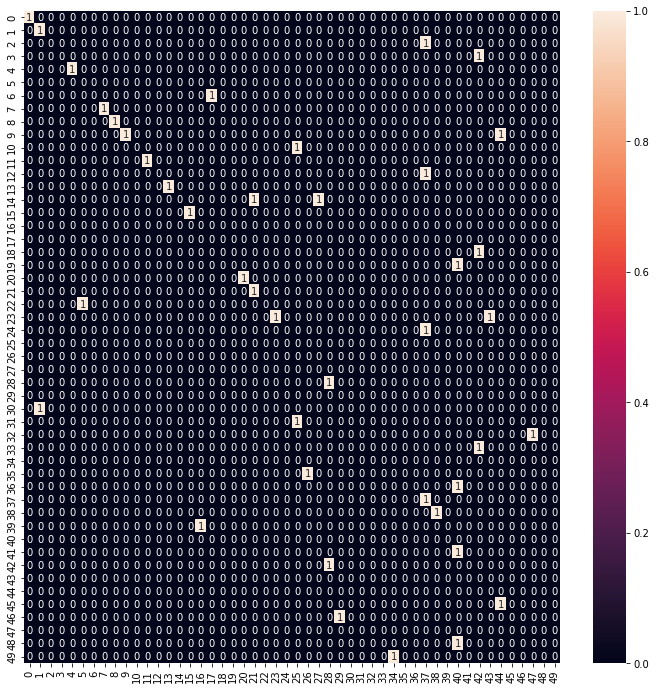

In [23]:
plt.figure(figsize=(12,12))
sns.heatmap(cm, annot=True)

**Prediction on test images**: Firstly, the test set had to be generated from the test images provided. 

**Separating test set card images**: To implement the approach used in task-1 for separating the card images, some pre-processing was required on test images. As the backgorund of images was green, firstly the images were converted to white backgorund by using rescale_intensity provided by skimage.exposure. After converting the images to white backgorund, the same approach as task-1 with gaussian blurring and binary thresholding was applied. Bounding boxes for the test cards were found and sliced from the test images. The test cards were also saved to results_dir.

In [24]:
import skimage.exposure
from google.colab.patches import cv2_imshow

for img in glob.glob(data_dir+"test*.jpeg"):  
  name = os.path.splitext(os.path.basename(img))[0]                             #getting the name of test image
  img_br = cv2.imread(img)
  
  # convert to hsv
  hsv = cv2.cvtColor(img_br,cv2.COLOR_BGR2HSV)                                  #converting image to HSV 

  # threshold using inRange
  range1 = (20,80,80)
  range2 = (90,255,255)
  mask = cv2.inRange(hsv,range1,range2)                                          #thresholding image and cretaing mask
  mask = 255 - mask

  # antialias mask
  mask = cv2.GaussianBlur(mask, (0,0), sigmaX=3, sigmaY=3, borderType = cv2.BORDER_DEFAULT)
  mask = skimage.exposure.rescale_intensity(mask, in_range=(127.5,255), out_range=(0,255))

  result = img_br.copy()
  result[mask==0] = (255,255,255)                                                #assigning value white to bg pixels

  gray = cv2.cvtColor(result, cv2.COLOR_BGR2GRAY)      
  blurred= cv2.GaussianBlur(gray,(5,5),cv2.BORDER_DEFAULT)
  thresh = 245
  fm = cv2.threshold(blurred, thresh, 255, cv2.THRESH_BINARY_INV)[1]

  fm=cv2.convertScaleAbs(fm)
  cnt_mod,_ = cv2.findContours(fm, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
  contours=[]

  for c in cnt_mod:
    if cv2.contourArea(c)>20000:
      contours.append(c)

  contours_poly = [None]*len(contours)
  boundRect = [None]*len(contours)

  for i, c in enumerate(contours):
    contours_poly[i] = cv2.approxPolyDP(c, 3, True)   
    boundRect[i] = cv2.boundingRect(contours_poly[i])

  idx=0

  for i in range(len(contours)):
    idx+=1
    x,y,w,h = boundRect[i]                                                              #finding bounding rectangle 
    roi=img_br[y:y+h,x:x+w]                                                             #slicing image using x,y, height, width
    re_im= cv2.resize(roi,resolution)
    cv2.imwrite(results_dir+name+'_'+str(idx) +'.jpg', re_im)                           #saving card images to results_dir

In [25]:
test_images=[]
name_test=[]

for img in glob.glob(results_dir+ "test*.jpg"):                                      #reading test images from results_dir

    im= cv2.imread(img)
    name_test.append(os.path.splitext(os.path.basename(img))[0])  
    im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
    im= cv2.resize(im,resolution)    

    test_images.append(im)
    

In [26]:
x_test= np.array(test_images).astype('float')/255.0                                 #normalized
print('x_test shape is ', x_test.shape)

x_test shape is  (140, 256, 256, 3)


In [27]:
y_pred_test= model.predict(x_test)                                                  #running predictions on test set

In [28]:
Y_pred_test = np.argmax(y_pred_test,axis = 1)


In [29]:
df_test= pd.DataFrame({'Test set file': name_test, 'Predicted ID': Y_pred_test}) 

In [30]:
df_test.head()

,Test set file,Predicted ID
0,test-001_1,112
1,test-001_3,33
2,test-001_5,162
3,test-001_6,121
4,test-001_2,168


In [31]:
df_test.to_csv(results_dir+'Test_im_pred_ID.csv')

**Running predictions on Card images from Train-001**

In [32]:
train001_images=[]
name_train001=[]

for img in glob.glob(results_dir+ "train-001*.jpg"):                                      #reading test images from results_dir

    im= cv2.imread(img)
    name_train001.append(os.path.splitext(os.path.basename(img))[0])  
    im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
    im= cv2.resize(im,resolution)    
    train001_images.append(im)
    

In [33]:
x_train001= np.array(train001_images).astype('float')/255.0                                 #normalized
print('x_train001 shape is ', x_train001.shape)

x_train001 shape is  (16, 256, 256, 3)


In [34]:
y_pred_train001= model.predict(x_train001)         

In [35]:
y_pred_train001 = np.argmax(y_pred_train001,axis = 1)
y_pred_train001

array([181, 172, 138, 111, 120, 162, 114, 109, 154,  31,   2, 172, 198,
       120, 154,  36])

In [36]:
df_train001= pd.DataFrame({'Train set 001 images': name_train001, 'Predicted ID': y_pred_train001}) 

In [37]:
df_train001

,Train set 001 images,Predicted ID
0,train-001_2,181
1,train-001_1,172
2,train-001_3,138
3,train-001_4,111
4,train-001_6,120
5,train-001_5,162
6,train-001_7,114
7,train-001_8,109
8,train-001_9,154
9,train-001_12,31
